In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [3]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# rename columns to something better
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})

In [8]:
df_train, df_test = train_test_split(df, test_size=0.33)
df_train.shape, df_test.shape

((3733, 3), (1839, 3))

In [9]:
# 0 = padding
idx = 1
word2idx = {'<PAD>': 0}

In [10]:
# You could also use gensim or spacy for tokenization
# but I wanted to keep it simple
for i, row in df_train.iterrows():
    tokens = row['data'].lower().split() # simple tokenization
    for token in tokens:
        if token not in word2idx:
            word2idx[token] = idx
            idx += 1

In [11]:
word2idx

{'<PAD>': 0,
 'you': 1,
 'have': 2,
 'won': 3,
 'a': 4,
 'guaranteed': 5,
 'å£200': 6,
 'award': 7,
 'or': 8,
 'even': 9,
 'å£1000': 10,
 'cashto': 11,
 'claim': 12,
 'ur': 13,
 'call': 14,
 'free': 15,
 'on': 16,
 '08000407165': 17,
 '(18+)': 18,
 '2': 19,
 'stop': 20,
 'getstop': 21,
 '88222': 22,
 'php': 23,
 'send': 24,
 'me': 25,
 "yetty's": 26,
 'number': 27,
 'pls.': 28,
 'nothing,': 29,
 'i': 30,
 'got': 31,
 'msg': 32,
 'frm': 33,
 'tht': 34,
 'unknown': 35,
 'no..': 36,
 'how': 37,
 'come': 38,
 'it': 39,
 'takes': 40,
 'so': 41,
 'little': 42,
 'time': 43,
 'for': 44,
 'child': 45,
 'who': 46,
 'is': 47,
 'afraid': 48,
 'of': 49,
 'the': 50,
 'dark': 51,
 'to': 52,
 'become': 53,
 'teenager': 54,
 'wants': 55,
 'stay': 56,
 'out': 57,
 'all': 58,
 'night?': 59,
 'then': 60,
 'just': 61,
 'eat': 62,
 'shit': 63,
 'and': 64,
 'wait': 65,
 'monkey': 66,
 'face': 67,
 'bitch..........': 68,
 'u': 69,
 'asshole..................': 70,
 'aww': 71,
 "that's": 72,
 'first': 73,
 'sa

In [12]:
len(word2idx)

10661

In [13]:
# convert data into word indices
# note: could have done this on the fly earlier
train_sentences_as_int = []
for i, row in df_train.iterrows():
    tokens = row['data'].lower().split()
    sentence_as_int = [word2idx[token] for token in tokens]
    train_sentences_as_int.append(sentence_as_int)

In [14]:
test_sentences_as_int = []
for i, row in df_test.iterrows():
    tokens = row['data'].lower().split()
    sentence_as_int = [word2idx[token] for token in tokens if token in word2idx]
    test_sentences_as_int.append(sentence_as_int)

In [15]:
len(train_sentences_as_int), len(test_sentences_as_int)

(3733, 1839)

In [16]:
def data_generator(X, y, batch_size=32):
    X,y = shuffle(X, y)
    n_batches = int(np.ceil(len(y) / batch_size))
    for i in range(n_batches):
        end = min((i+1)*batch_size, len(y))

        X_batch = X[i*batch_size:end]
        y_batch = y[i*batch_size:end]

        # pad X_batch to be N x T
        max_len = max(len(x) for x in X_batch)
        for j in range(len(X_batch)):
            x = X_batch[j]
            pad = [0] * (max_len - len(x))
            X_batch[j] = x + pad

        # convert to tensors
        X_batch = torch.from_numpy(np.array(X_batch)).long()
        y_batch = torch.from_numpy(np.array(y_batch)).long()

        yield X_batch, y_batch

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [18]:
# What is the shape of embedding outputs?
# N x T x D
embed = nn.Embedding(len(word2idx), 20)
for inputs, targets in data_generator(train_sentences_as_int, df_train.b_labels):
    out = embed(inputs)
    print("Input shape:", inputs.shape)
    print("Output shape:", targets.shape)
    break

Input shape: torch.Size([32, 35])
Output shape: torch.Size([32])


In [19]:
# Define the model
class CNN(nn.Module):
    def __init__(self, n_vocab, embed_dim, n_outputs):
        super(CNN, self).__init__()
        self.V = n_vocab
        self.D = embed_dim
        self.K = n_outputs

        self.embed = nn.Embedding(self.V, self.D)

        self.conv1 = nn.Conv1d(self.D, 32, 3, padding=1)
        self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool1d(2)
        self.conv3 = nn.Conv1d(64, 128, 3, padding=1)

        self.fc = nn.Linear(128, self.K)

    def forward(self, X):
        # embedding layer
        # turns word indexes into word vectors
        out = self.embed(X)

        # conv layers
        out = out.permute(0,2,1)
        out = self.conv1(out)
        out = F.relu(out)
        out = self.pool1(out)
        
        out = self.conv2(out)
        out = F.relu(out)
        out = self.pool2(out)
        
        out = self.conv3(out)
        out = F.relu(out)
        
        # Change it back
        out = out.permute(0,2,1)

        # max pool
        out, _ = torch.max(out, 1)

        # final dense layer
        out = self.fc(out)
        return out

In [20]:
model = CNN(len(word2idx), 20, 1)
model.to(device)

CNN(
  (embed): Embedding(10661, 20)
  (conv1): Conv1d(20, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [21]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [22]:
train_gen = lambda: data_generator(train_sentences_as_int, df_train.b_labels)
test_gen = lambda: data_generator(test_sentences_as_int, df_test.b_labels)

In [23]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_gen():
            # print("inputs.shape", inputs.shape, "targets.shape", targets.shape)
            targets = targets.view(-1, 1).float()
            # move data to GPU
            inputs, targets = inputs.to(device), targets.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # backward and optimize
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())

        # Get train loss and test accuracy
        train_loss = np.mean(train_loss) # a little misleading 

        test_loss = []
        for inputs, targets in test_gen():
            inputs, targets = inputs.to(device), targets.to(device)
            targets = targets.view(-1, 1).float()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        print(f"Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}")

    return train_losses, test_losses

In [24]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, 8)

Epoch 1/8, Train Loss: 0.3922, Test Loss: 0.3774, Duration: 0:00:03.405485
Epoch 2/8, Train Loss: 0.2763, Test Loss: 0.2006, Duration: 0:00:02.860801
Epoch 3/8, Train Loss: 0.1266, Test Loss: 0.1918, Duration: 0:00:01.377526
Epoch 4/8, Train Loss: 0.0849, Test Loss: 0.1637, Duration: 0:00:01.271013
Epoch 5/8, Train Loss: 0.0540, Test Loss: 0.1359, Duration: 0:00:01.299999
Epoch 6/8, Train Loss: 0.0331, Test Loss: 0.1492, Duration: 0:00:01.391265
Epoch 7/8, Train Loss: 0.0215, Test Loss: 0.1332, Duration: 0:00:01.288359
Epoch 8/8, Train Loss: 0.0155, Test Loss: 0.1309, Duration: 0:00:01.281877


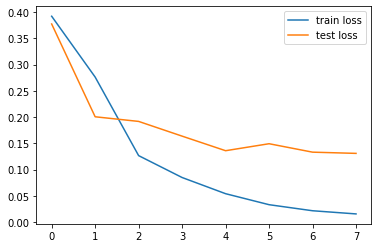

In [25]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [26]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in train_gen():
    targets = targets.view(-1, 1).float()
    inputs, targets = inputs.to(device), targets.to(device)

    # forward pass
    outputs = model(inputs)
    
    # get predictions
    predictions = (outputs > 0).float()

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_gen():
    targets = targets.view(-1, 1).float()
    inputs, targets = inputs.to(device), targets.to(device)

    # forward pass
    outputs = model(inputs)
    
    # get predictions
    predictions = (outputs > 0).float()

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9976, Test acc: 0.9685
